In [5]:
!gdown --id '15XWO-zI-AKW0igfwSydmwSGa8ENb9wCg' --output data-bin.tar.gz 

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15XWO-zI-AKW0igfwSydmwSGa8ENb9wCg
To: /kaggle/working/data-bin.tar.gz
100%|███████████████████████████████████████| 1.64G/1.64G [00:05<00:00, 282MB/s]


In [9]:
!tar zxvf data-bin.tar.gz
!ls data-bin
!ls data-bin
!rm data-bin.tar.gz

tar (child): data-bin.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
testingset.npy	trainingset.npy
testingset.npy	trainingset.npy
rm: cannot remove 'data-bin.tar.gz': No such file or directory


In [10]:
import torch
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader

#data processing
train_data=np.load("/kaggle/working/data-bin/trainingset.npy",allow_pickle=True)
test_data=np.load("/kaggle/working/data-bin/testingset.npy",allow_pickle=True)
test_data=torch.tensor(test_data)
test_data=test_data.permute(0,3,1,2)
train_data=torch.tensor(train_data)
train_data=train_data.permute(0,3,1,2)
print(train_data.shape)

class Mydataset(Dataset):
    def __init__(self,data):
        self.data=data
        self.transform=transforms.Compose([
                            transforms.Lambda(lambda x: x.to(torch.float32)),
                            transforms.Lambda(lambda x: 2. * x/255. - 1.),
                            ])
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.transform(self.data[idx])

train_set=Mydataset(train_data)
train_loader=DataLoader(train_set,batch_size=10000)
test_set=Mydataset(test_data)

torch.Size([140001, 3, 64, 64])


In [11]:
import torch.nn as nn

#model
class cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(3,12,4,stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(12,24,4,stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(24,48,4,stride=2,padding=1),
            nn.ReLU()
        )
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(48,24,4,stride=2,padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(24,12,4,stride=2,padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(12,3,4,stride=2,padding=1),
            nn.Tanh()
        )
    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x




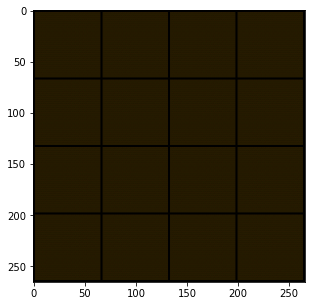

epoch: 16  train_loss: 0.3812926709651947
epoch: 2  train_loss: 0.22524770001570385
epoch: 3  train_loss: 0.15708598891894024
epoch: 4  train_loss: 0.11071785638729731
epoch: 5  train_loss: 0.08640924046436946
epoch: 6  train_loss: 0.07150274366140366
epoch: 7  train_loss: 0.05998963912328084
epoch: 8  train_loss: 0.05398571441570918
epoch: 9  train_loss: 0.04907256265481313
epoch: 10  train_loss: 0.04549907942612966


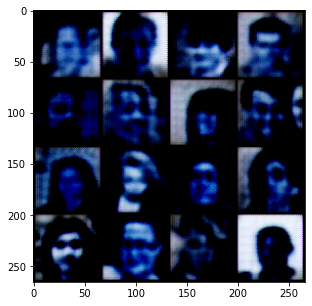

epoch: 16  train_loss: 0.04333381031950315
epoch: 12  train_loss: 0.040604126950105034
epoch: 13  train_loss: 0.038648079087336855
epoch: 14  train_loss: 0.03719915598630905
epoch: 15  train_loss: 0.03642758379379908
epoch: 16  train_loss: 0.03486790806055069
epoch: 17  train_loss: 0.03367759697139263
epoch: 18  train_loss: 0.03241313484807809
epoch: 19  train_loss: 0.03265910347302755
epoch: 20  train_loss: 0.03125193702677886


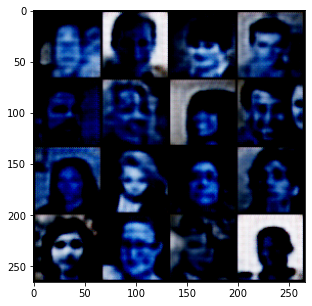

epoch: 16  train_loss: 0.030184388160705566
epoch: 22  train_loss: 0.029357175653179485
epoch: 23  train_loss: 0.028686644757787386
epoch: 24  train_loss: 0.028075943638881048
epoch: 25  train_loss: 0.027372487261891364
epoch: 26  train_loss: 0.026781136045853297
epoch: 27  train_loss: 0.02634148473540942
epoch: 28  train_loss: 0.02660463141898314
epoch: 29  train_loss: 0.02581902891397476
epoch: 30  train_loss: 0.025087644656499226


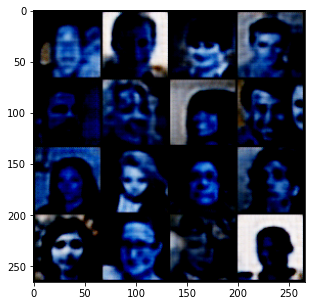

epoch: 16  train_loss: 0.024717812612652778
epoch: 32  train_loss: 0.024217807749907175
epoch: 33  train_loss: 0.024024433890978494
epoch: 34  train_loss: 0.023922506223122277
epoch: 35  train_loss: 0.02358140746752421
epoch: 36  train_loss: 0.022758154198527336
epoch: 37  train_loss: 0.02231338284909725
epoch: 38  train_loss: 0.022039071594675382
epoch: 39  train_loss: 0.022952880213658013
epoch: 40  train_loss: 0.02216030110915502


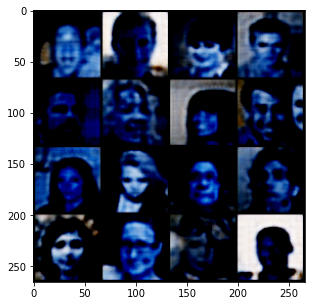

epoch: 16  train_loss: 0.021747379129131637
epoch: 42  train_loss: 0.021294388795892398
epoch: 43  train_loss: 0.020877105928957463
epoch: 44  train_loss: 0.02057966055969397
epoch: 45  train_loss: 0.020162060918907324
epoch: 46  train_loss: 0.01994821975628535
epoch: 47  train_loss: 0.01984636907776197
epoch: 48  train_loss: 0.019549394336839516
epoch: 49  train_loss: 0.019618499527374902
epoch: 50  train_loss: 0.019145955952505272


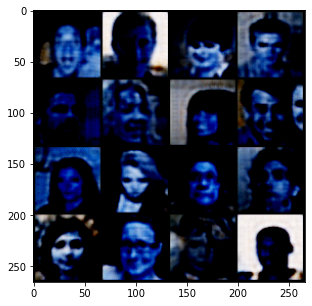

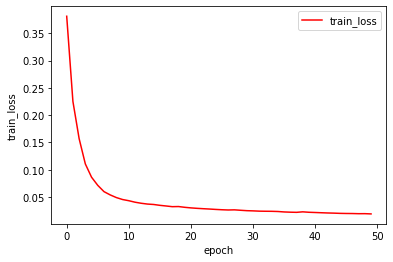

In [26]:
from torch.optim import Adam
import matplotlib.pyplot as plt
import torchvision

#parameters
epoch=50
lr=0.001
model=cnn().to("cuda")
optimizer=Adam(model.parameters(),lr=lr)
criterion=nn.MSELoss()

#training process
train_loss_list=[]
best_loss=float('inf')
for i in range(epoch):
    train_loss=0.0
    
    if i%10==0:
        images=[]
        for i in range(0,16):
            q=test_set[i].to('cuda')
            im=model(q)
            images.append(im.cpu())
        grid_img = torchvision.utils.make_grid(images, nrow=4)
        plt.figure(figsize=(5,5))
        plt.imshow(grid_img.permute(1, 2, 0))
        plt.show()
    model.train()
    for j,data in enumerate(train_loader):
        data=data.to("cuda")
        output=model(data)
        loss=criterion(output,data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    train_loss/=len(train_loader)
    train_loss_list.append(train_loss) 
    print('epoch:',i+1,' train_loss:',train_loss)
    if(train_loss<best_loss):
        torch.save(model.state_dict(),'model.pt')
    
images=[]
for i in range(0,16):
    q=test_set[i].to('cuda')
    im=model(q)
    images.append(im.cpu())
grid_img = torchvision.utils.make_grid(images, nrow=4)
plt.figure(figsize=(5,5))
plt.imshow(grid_img.permute(1, 2, 0))
plt.show()
    
plt.figure()
x=range(0,50)
plt.xlabel("epoch")
plt.ylabel("train_loss")
plt.plot(x,train_loss_list,color='r',label='train_loss')
plt.legend()
plt.show()

torch.Size([1, 19999])
normal loss: tensor([[0.0043, 0.0047, 0.0048, 0.0049, 0.0050, 0.0052, 0.0053, 0.0053, 0.0055,
         0.0055, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0059]],
       grad_fn=<SliceBackward0>)
anomoly loss: tensor([[0.0929, 0.0946, 0.0949, 0.0953, 0.0953, 0.0957, 0.0973, 0.0986, 0.0987,
         0.1027, 0.1034, 0.1042, 0.1104, 0.1120, 0.1419, 0.1568]],
       grad_fn=<SliceBackward0>)
normal class:
original images


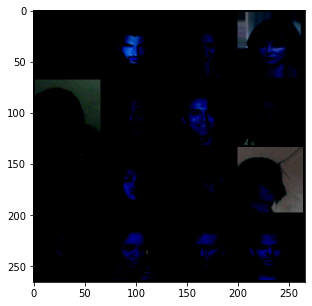

output images:


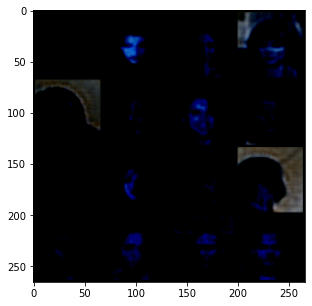

anomoly class:
original images


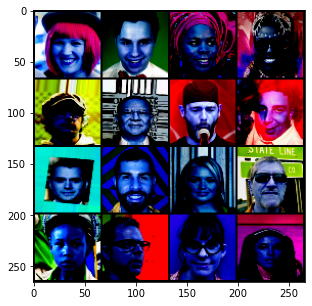

output images


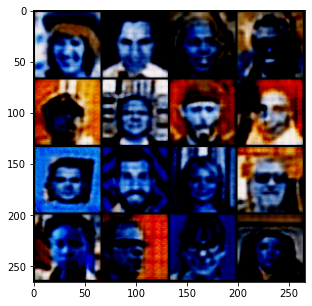

In [32]:
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

#print 16 pictures with the smallest loss
criterion=nn.MSELoss()
model=cnn()
model.load_state_dict(torch.load('/kaggle/input/modell/model.pt'))
model=model.to("cuda")
lost=torch.tensor([])
for i in range(0,19999):
    data=test_set[i]
    data=data.to('cuda')
    loss=criterion(model(data),data)
    loss=torch.unsqueeze(loss,dim=0)
    lost=torch.cat([lost,loss.cpu()],dim=0)
lost=torch.unsqueeze(lost,dim=0)
print(lost.shape)
b,a=torch.sort(lost,dim=1)
print("normal loss:",b[:,0:16])
print("anomoly loss:",b[:,-17:-1])

ori=[]
mod=[]
for i in range(0,16):
    q=test_set[a[:,i].item()].to('cuda')
    im=model(q).cpu()
    ori.append(im.detach())
    mod.append(q.cpu())

print("normal class:")
print('original images')    
grid_img = torchvision.utils.make_grid(mod, nrow=4)
plt.figure(figsize=(5,5))
grid_img=torch.squeeze(grid_img,dim=0)
plt.imshow(grid_img.permute(1,2,0))
plt.show()

print('output images:')
grid_img = torchvision.utils.make_grid(ori, nrow=4)
plt.figure(figsize=(5,5))
grid_img=torch.squeeze(grid_img,dim=0)
plt.imshow(grid_img.permute(1,2,0))
plt.show()

#print 16 pictures with the largest loss
ori=[]
mod=[]
for i in range(-17,-1):
    q=test_set[a[:,i].item()].to('cuda')
    im=model(q).cpu()
    ori.append(im.detach())
    mod.append(q.cpu())

print("anomoly class:")
print('original images')
grid_img = torchvision.utils.make_grid(mod, nrow=4)
plt.figure(figsize=(5,5))
grid_img=torch.squeeze(grid_img,dim=0)
plt.imshow(grid_img.permute(1,2,0))
plt.show()


print('output images')
grid_img = torchvision.utils.make_grid(ori, nrow=4)
plt.figure(figsize=(5,5))
grid_img=torch.squeeze(grid_img,dim=0)
plt.imshow(grid_img.permute(1,2,0))
plt.show()